In [6]:
from skimage.filters import threshold_local
from cv_methods.preload import MainCVClass
from matplotlib import pyplot as plt

import numpy as np
import argparse
import cv2
import imutils


class DocScan:
    def __init__(self, path, resize):
        self.image = cv2.imread(path)
        self.ratio = self.image.shape[0] / 500
        self.orig = self.image.copy()
        self.gray = np.array([])

    def test1(self):

        self.gray = 255-cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        
        plt.figure(figsize=(32,32))
        plt.imshow(self.gray, cmap='gray')
        plt.show()

        return self.gray

    def test2(self):

        gauss = cv2.GaussianBlur(self.gray, (11, 11), 0)
        median_blur = cv2.medianBlur(self.gray, 5)
        
        f, axarr = plt.subplots(2,1, figsize=(32,32)) 
        axarr[0].imshow(gauss, cmap='gray')
        axarr[1].imshow(median_blur, cmap='gray')
        plt.show()

        return gauss

    def test3(self):

        gray = cv2.GaussianBlur(self.gray, (11, 11), 0)

        otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

        th3 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
        
        f, axarr = plt.subplots(2,1, figsize=(32,32)) 
        axarr[0].imshow(th3, cmap='gray')
        axarr[1].imshow(otsu, cmap='gray')
        plt.show()

        return th3, otsu

    def get_edget(self):

        gray = cv2.GaussianBlur(self.gray, (11, 11), 0)

        th3 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        edged = cv2.Canny(th3, 80, 200)

        edged_for_watching = imutils.resize(edged.copy(), height=500)

        f, axarr = plt.subplots(2,1, figsize=(32,32)) 
        axarr[0].imshow(th3, cmap='gray')
        axarr[1].imshow(edged, cmap='gray')
        plt.show()

        return th3, edged



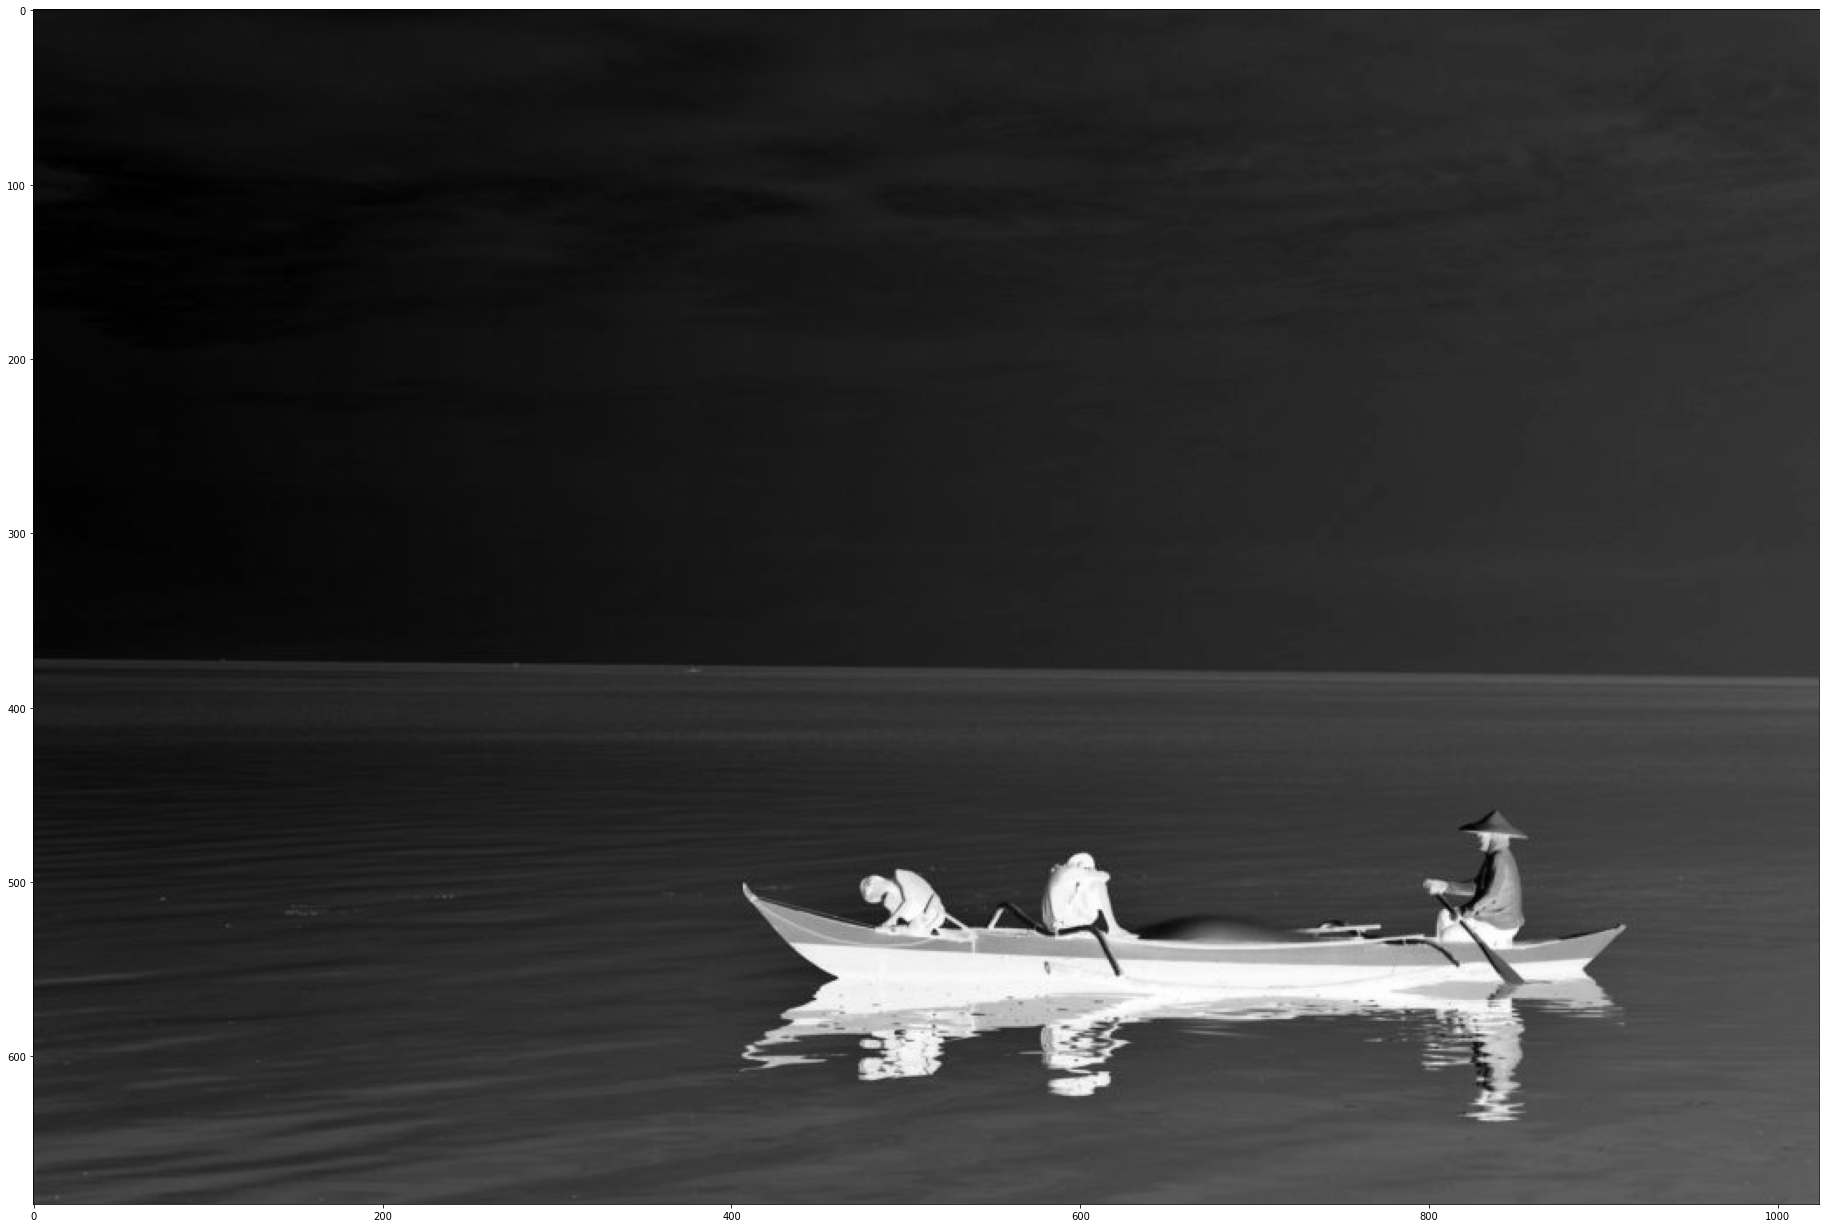

In [7]:
test = DocScan("../boat_initial-1024x685.jpg", False)
img1 = test.test1()

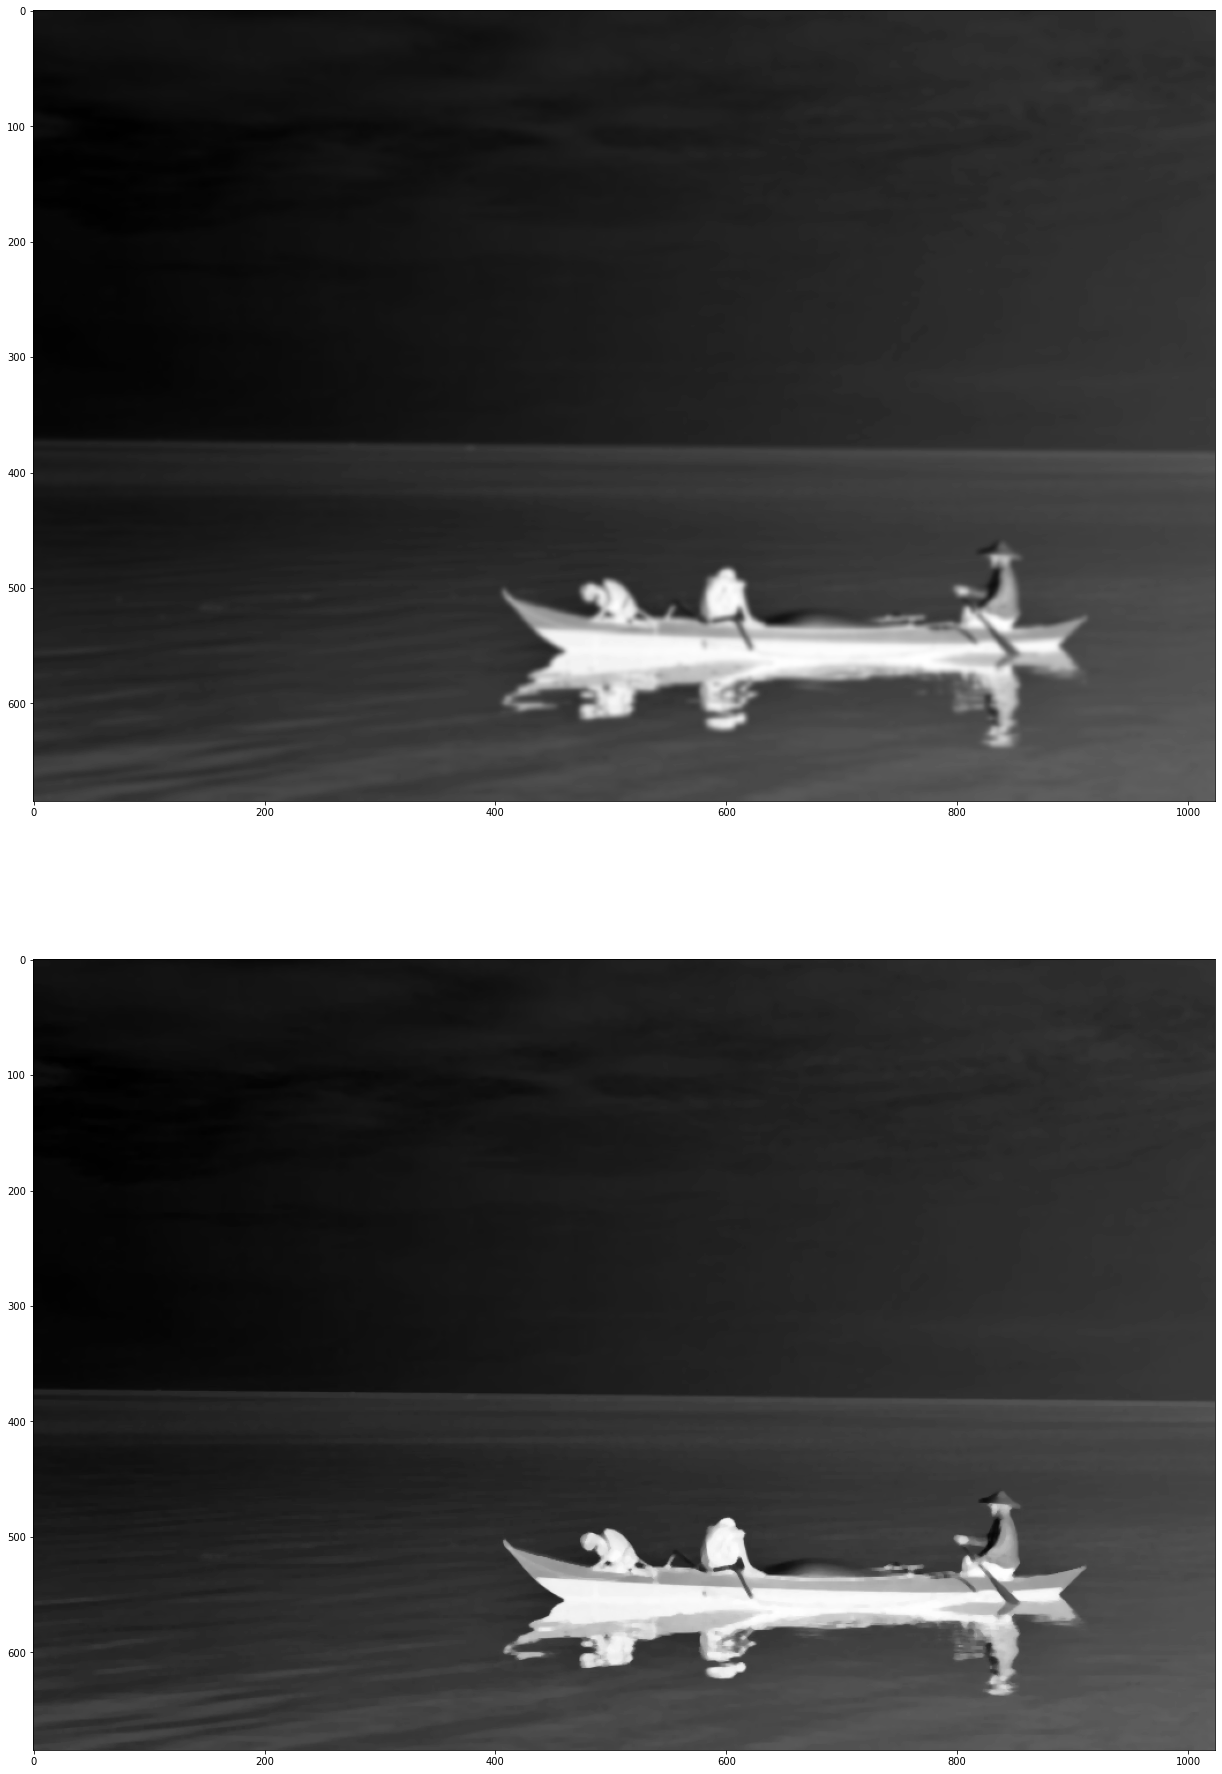

In [8]:
img2 = test.test2()

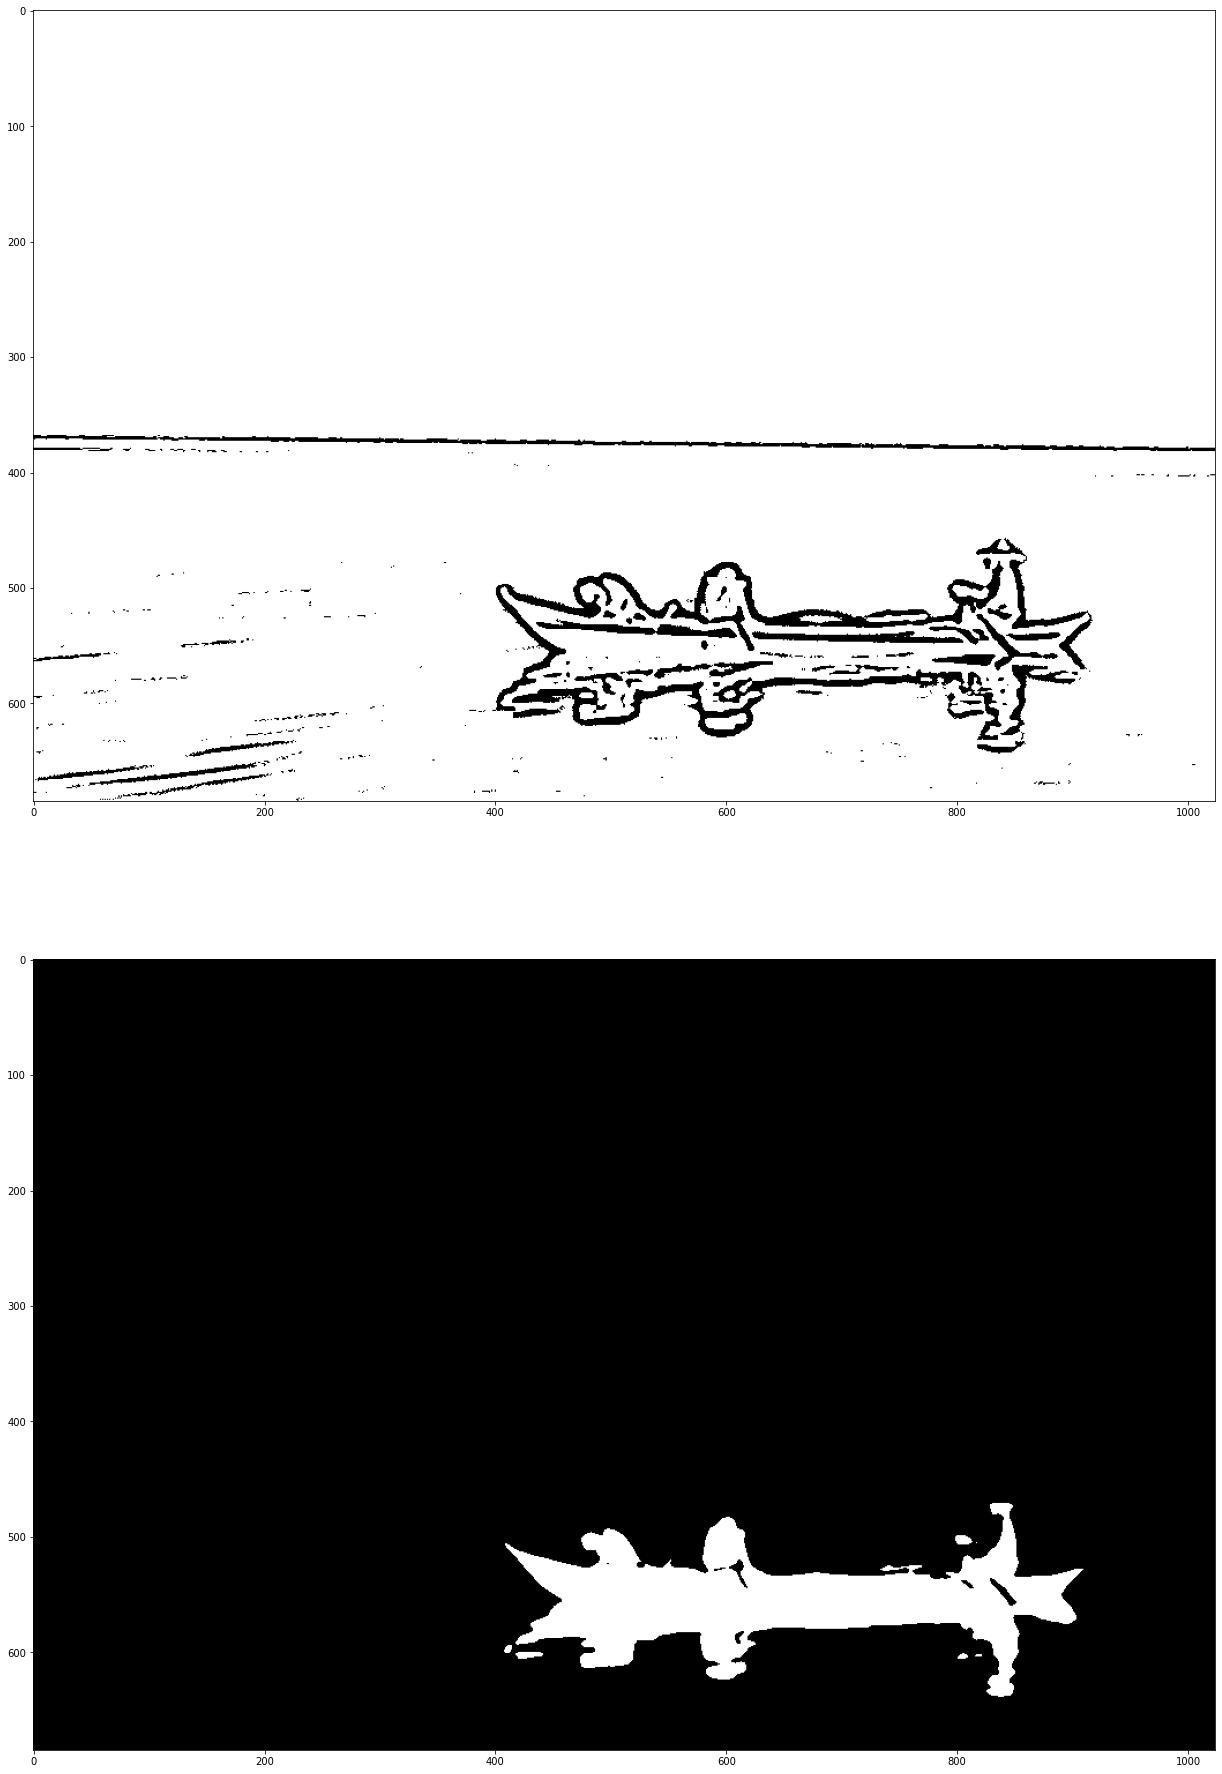

In [9]:
img3, img4 = test.test3()

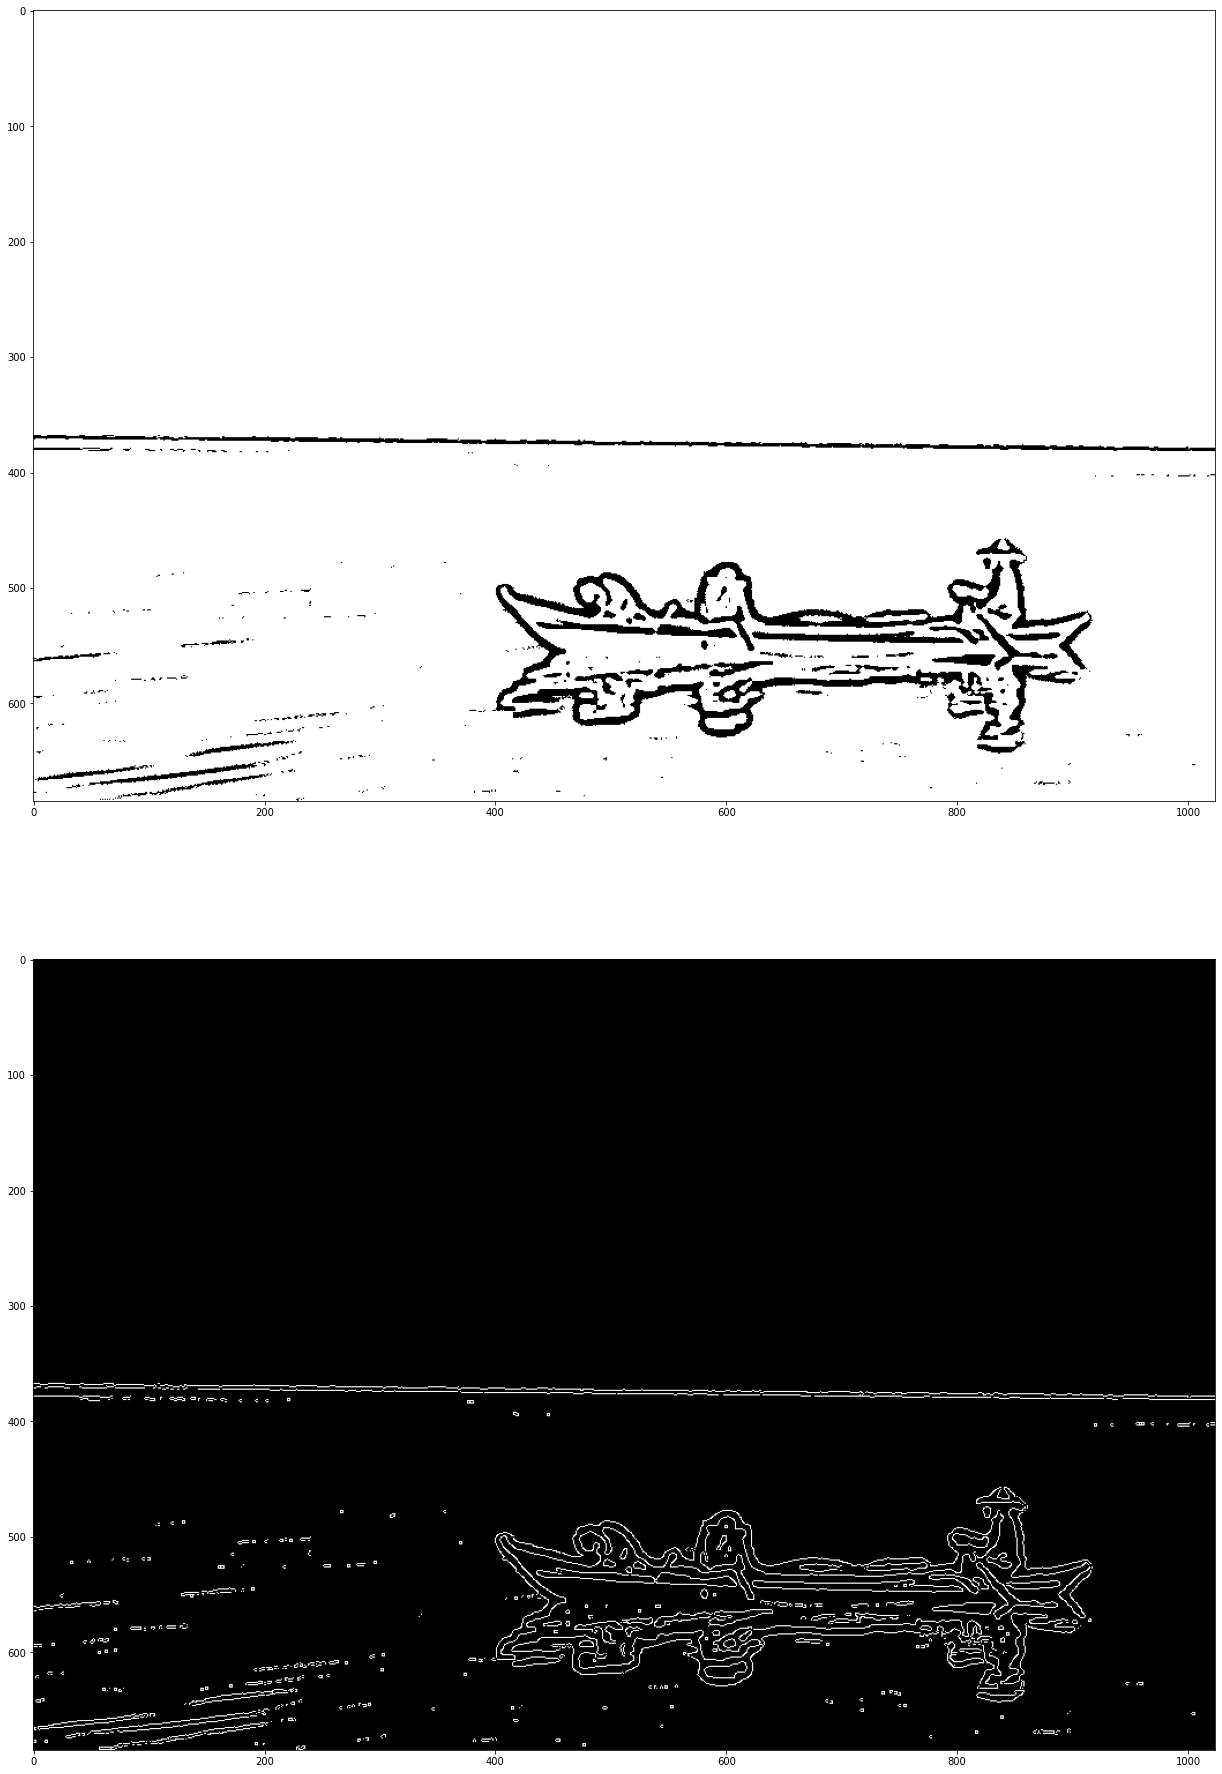

In [10]:
img5, img6 = test.get_edget()

In [11]:
def get_many_plotting(imges):
    fig, axs = plt.subplots(6, 1, figsize=(18, 60), sharey=True)
    i = 0
    
    for img in imges:
            
        img = img.flatten()
        names, values = np.unique(img, return_counts=True)
        
        axs[i].bar(names.tolist(), values.tolist())
        i+=1
        
    fig.suptitle('Categorical Plotting')

In [12]:
def get_plotting(img):
    img = img.flatten()
    names, values = np.unique(img, return_counts=True)
    
    fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
    axs.bar(names.tolist(), values.tolist())
    fig.suptitle('Categorical Plotting')

In [13]:
img_list = [img1,img2,img3,img4,img5,img6]

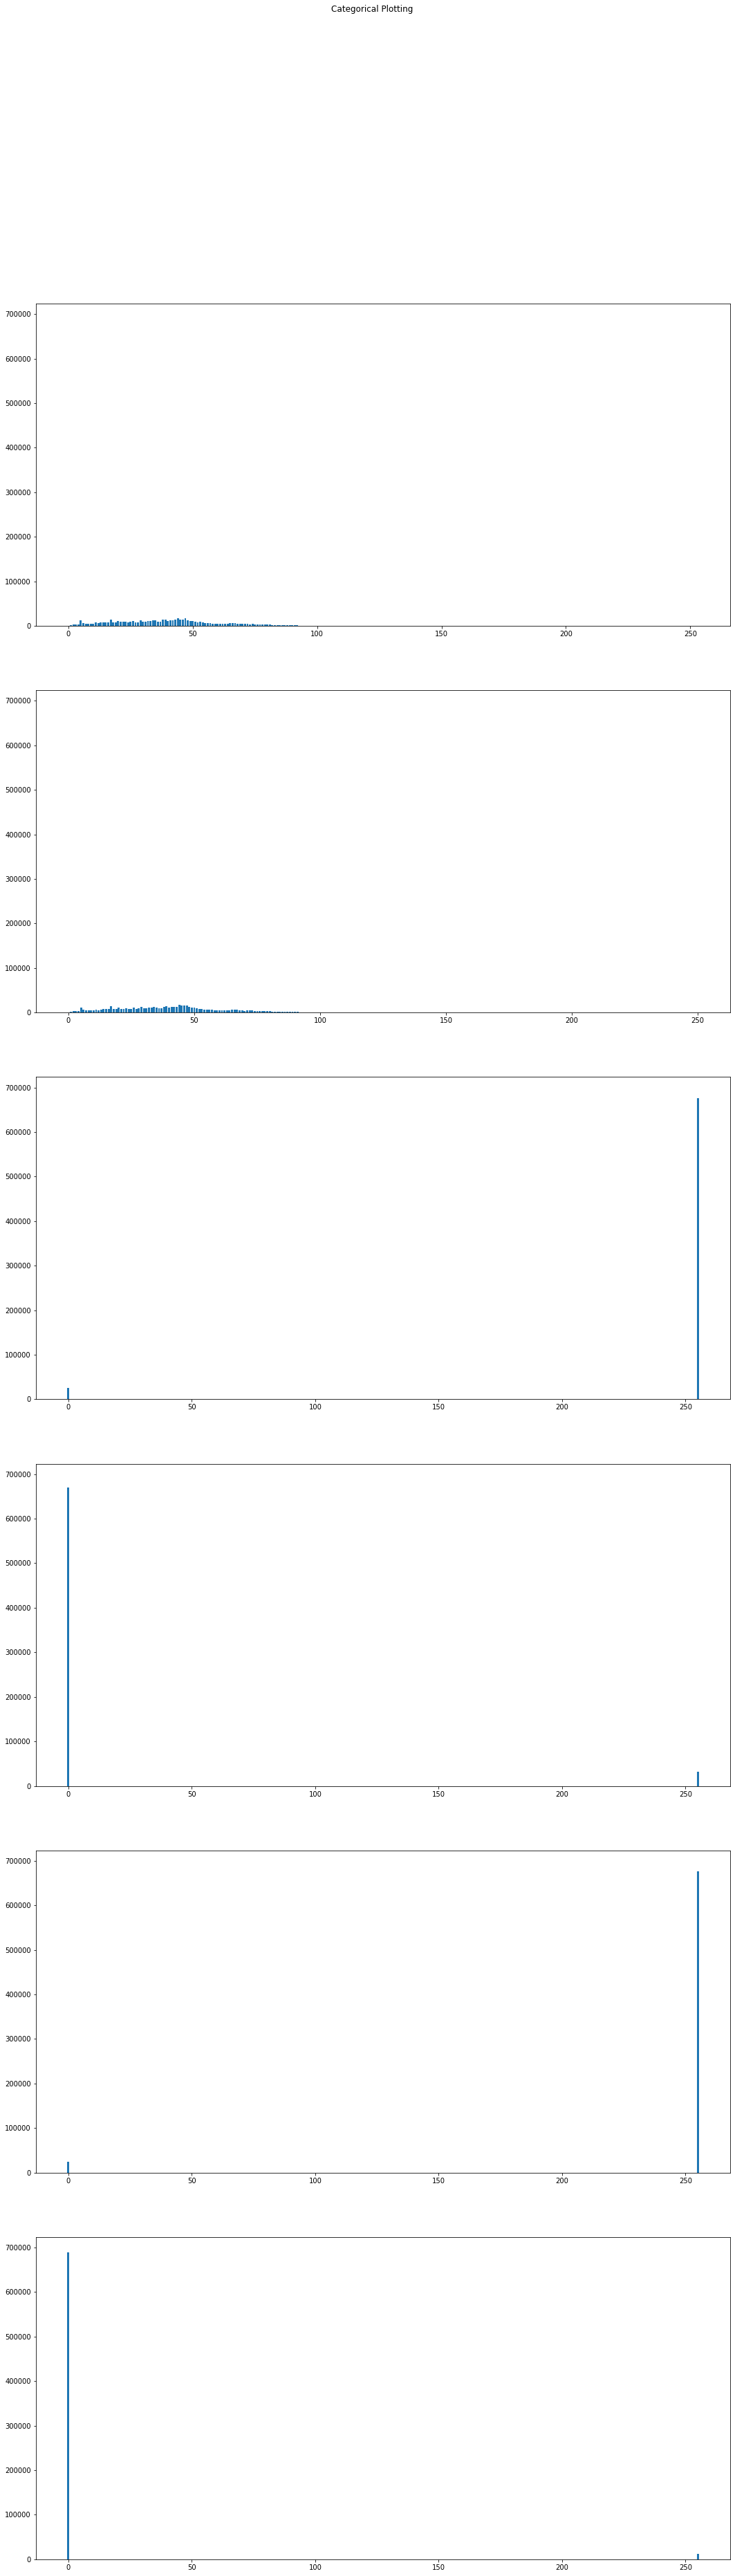

In [14]:
get_many_plotting(img_list)

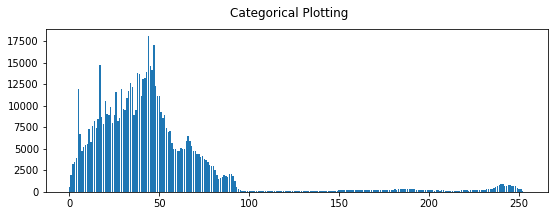

In [15]:
get_plotting(img1)

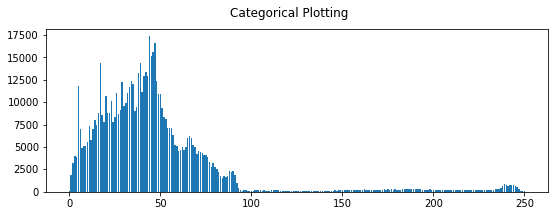

In [16]:
get_plotting(img2)

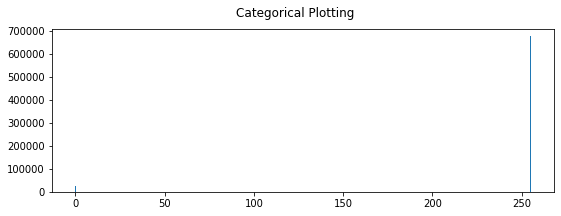

In [17]:
get_plotting(img3)

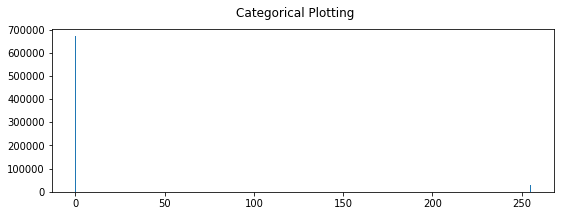

In [18]:
get_plotting(img4)

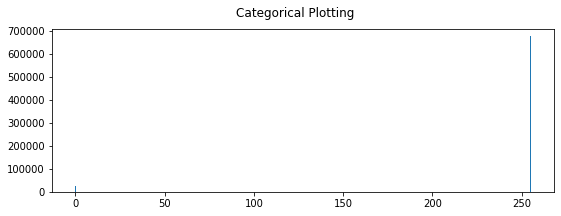

In [19]:
get_plotting(img5)

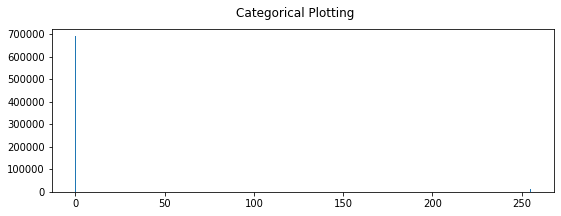

In [20]:
get_plotting(img6)

In [21]:
img1.shape

(685, 1024)

In [22]:
img = img1.reshape(-1)
img.shape
names, values = np.unique(img, return_counts=True)

In [23]:
if 256 - len(values) > 0:
    zeros_list = range(0, 256-len(values))
    values = np.append(values, [0 for i in zeros_list])
    names = np.append(names, [0 for i in zeros_list])

In [24]:
values

array([  570,  1908,  3211,  3464,  3881, 11995,  6760,  4750,  5185,
        5385,  5535,  7317,  5789,  7696,  8238,  7398,  8451, 14726,
        8710,  7847, 10561,  9096,  8919,  9897,  7946,  8978, 11599,
        8266,  8556, 12001,  9603,  9516, 10929, 11767, 12682, 12230,
        8937,  9493, 13871, 13685, 11126, 13111, 13262, 13948, 18061,
       14658, 14159, 17110, 12327, 11157, 11096,  9331,  8584,  8897,
        7396,  6981,  7069,  5709,  4968,  4961,  4688,  4792,  5132,
        4954,  4954,  5933,  6506,  5955,  5333,  4758,  4742,  4446,
        4345,  4000,  4139,  3770,  3753,  3462,  3121,  3038,  2987,
        2589,  1966,  1482,  1635,  1758,  1900,  1803,  1693,  2108,
        2016,  1805,  1212,   595,   298,   176,   106,   105,    73,
          84,    74,    75,    65,    74,    73,    75,    62,    76,
          75,    64,    52,    48,    52,    55,    71,    70,    71,
          79,    55,    62,    66,    70,    60,    57,    72,    67,
          66,    72,

In [25]:
values = values.reshape(-1,16)
names = names.reshape(-1,16)

In [26]:
values.shape, names.shape

((16, 16), (16, 16))

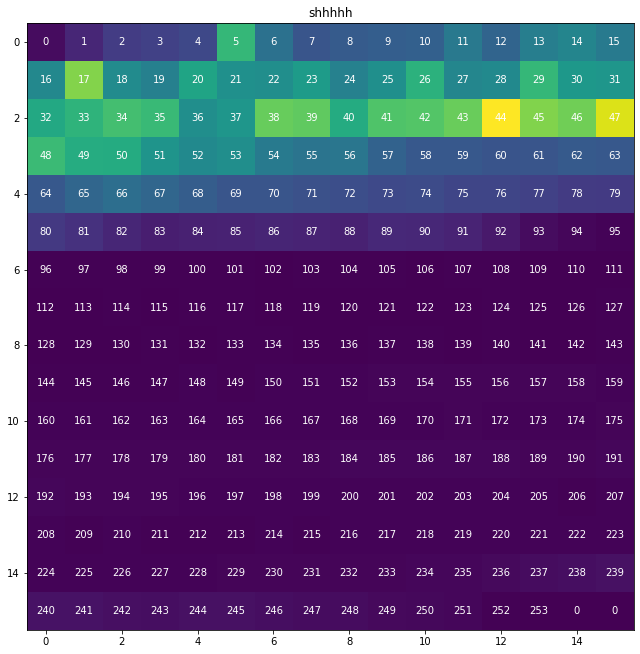

In [27]:
fig, ax = plt.subplots(figsize=(9,18))
im = ax.imshow(values)

for i in range(names.shape[0]):
    for j in range(names.shape[1]):
        text = ax.text(j, i, names[i, j],
                       ha="center", va="center", color="w")

ax.set_title("shhhhh")
fig.tight_layout()
plt.show()